Generate some random data along a line\
Use GPR to fit.

In [1]:
import numpy as np

In [21]:
x = np.linspace(0,100, 101)

In [22]:
def func(x):
    return x*np.sin(x)

In [10]:
import matplotlib.pyplot as plt

In [23]:
y = func(x)

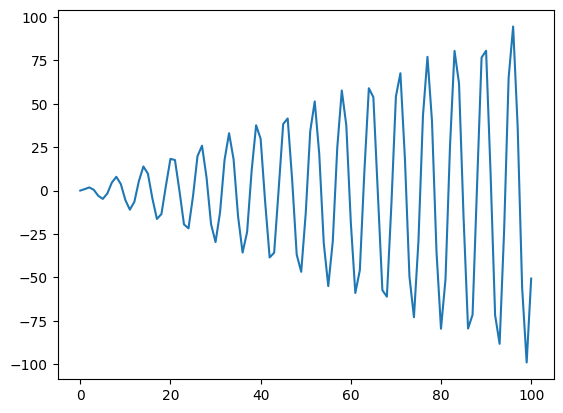

In [24]:
plt.plot(np.sort(x), y)

In [50]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [64]:
kernel = RBF(length_scale=1)
GPR = GaussianProcessRegressor(kernel=None)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

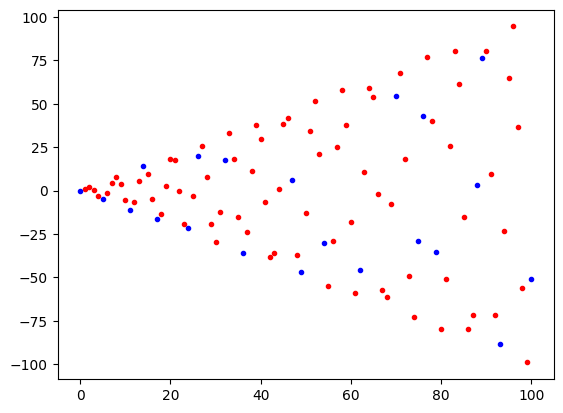

In [67]:
plt.scatter(x_train, y_train, marker='.', color='r')
plt.scatter(x_test, y_test, marker='.', color='b')

In [ ]:
GPR.fit(x_train.reshape(-1,1), y_train)

GaussianProcessRegressor()

In [ ]:
mean, std = GPR.predict(x_test.reshape(-1,1), return_std=True)

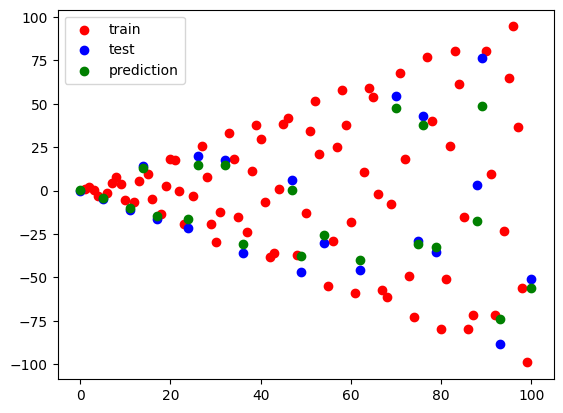

In [70]:
plt.scatter(x_train, y_train, marker='o', color='r', label='train')
plt.scatter(x_test, y_test, marker='o', color='b', label='test')
plt.scatter(x_test, mean, marker='o', color='g', label='prediction')
plt.legend()

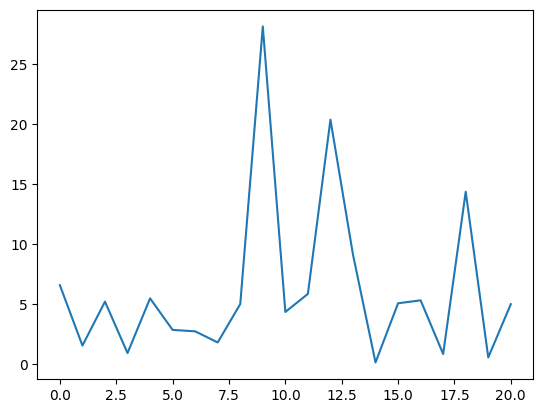

In [71]:
plt.plot(abs(mean - y_test))

In [72]:
print(max(abs(mean - y_test)))
print(min(abs(mean - y_test)))

28.139327507113265
0.14481790092970848


In [73]:
from sklearn.model_selection import KFold, cross_val_score

In [74]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [85]:
best_score = np.inf
best_degree = 0

test_scores = []

scales = np.linspace(0.15,0.18,20)

In [88]:
for scale in scales:
    kernel = RBF(length_scale=scale)
    model = GaussianProcessRegressor(kernel=kernel)
    scores = cross_val_score(model, x.reshape(-1,1), y.reshape(-1,1), cv=kf, scoring='neg_mean_squared_error')
    scores = -scores  # Negate the scores to get positive MSE
    test_scores.append(np.mean(scores))    

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale 

In [93]:
best_scale = scales[np.argmin(test_scores)]

In [94]:
kernel = RBF(length_scale=best_scale)
GPR = GaussianProcessRegressor(kernel=None)
GPR.fit(x_train.reshape(-1,1), y_train)
mean, std = GPR.predict(x_test.reshape(-1,1), return_std=True)

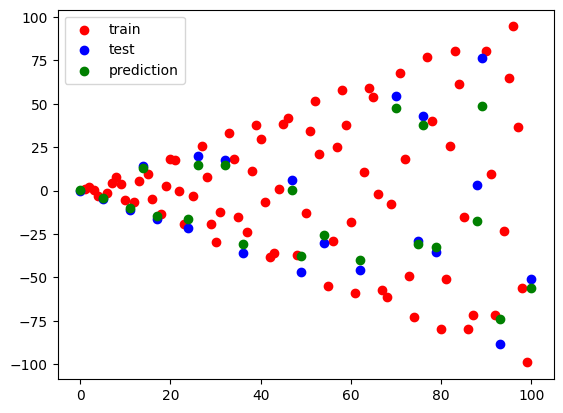

In [95]:
plt.scatter(x_train, y_train, marker='o', color='r', label='train')
plt.scatter(x_test, y_test, marker='o', color='b', label='test')
plt.scatter(x_test, mean, marker='o', color='g', label='prediction')
plt.legend()